# Preprocessing

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

### Select the tickers and timeframe

In [79]:
import pandas as pd

# Load the Excel file
data_path = 'D:\RL\pro\Benchmarking-Strategies-for-Asset-Allocation/data.xlsx'
data = pd.read_excel(data_path)

# Assume that your Excel file has a similar structure to the data you previously fetched
# If your Excel file has different column names or structure, you'll need to adjust the following steps accordingly.

# Process the data as needed
# For example, if you need to fill NaN values, you can use ffill and bfill as before
data.ffill(inplace=True)
data.bfill(inplace=True)

# If you need only the 'Adj Close' prices and they are in a specific column, select that column
# For example, if the 'Adj Close' prices are in a column named 'Adj Close', you can do:
# adj_close_data = data['Adj Close']

# Check the first few rows of the dataframe
data.head()

<>:4: DeprecationWarning: invalid escape sequence '\R'


Date  AXP.N   BA.N  CAT.N  CRM.N  CVX.N  DIS.N    GS.N   HD.N   IBM.N  \
0  2010/1/4  40.92  56.18  58.55  74.82  79.06  32.07  173.08  28.67  132.45   
1  2010/1/5  40.83  58.02  59.25  74.50  79.62  31.99  176.14  28.88  130.85   
2  2010/1/6  41.49  59.78  59.43  74.37  79.63  31.82  174.26  28.78  130.00   
3  2010/1/7  41.98  62.20  59.67  74.04  79.33  31.83  177.67  29.12  129.55   
4  2010/1/8  41.95  61.60  60.34  74.15  79.47  31.88  174.31  28.98  130.85   

   ...  TRV.N  UNH.N    V.N   VZ.N  WMT.N  AAPL.O   AMGN.O  CSCO.O  INTC.O  \
0  ...  49.81  31.53  88.14  33.28  54.23  214.01  57.7153   24.69   20.88   
1  ...  48.63  31.48  87.13  33.34  53.69  214.38  57.2200   24.58   20.87   
2  ...  47.94  31.79  85.96  31.92  53.57  210.97  56.7900   24.42   20.80   
3  ...  48.63  33.01  86.76  31.73  53.60  210.58  56.2700   24.53   20.60   
4  ...  48.56  32.70  87.00  31.75  53.33  211.98  56.7700   24.66   20.83   

   MSFT.O  
0  30.950  
1  30.960  
2  30.770  
3  30.452  
4  30.660  

[5 rows x 28 columns]

### We check that tehre are no NAN values

In [80]:
data.isna().sum()

Date      0
AXP.N     0
BA.N      0
CAT.N     0
CRM.N     0
CVX.N     0
DIS.N     0
GS.N      0
HD.N      0
IBM.N     0
JNJ.N     0
JPM.N     0
KO.N      0
MCD.N     0
MMM.N     0
MRK.N     0
NKE.N     0
PG.N      0
TRV.N     0
UNH.N     0
V.N       0
VZ.N      0
WMT.N     0
AAPL.O    0
AMGN.O    0
CSCO.O    0
INTC.O    0
MSFT.O    0
dtype: int64

### Check if all tickers have the same number of data points

In [81]:
tickers=["AXP.N", "BA.N", "CAT.N", "CRM.N", "CVX.N", "DIS.N", "GS.N", "HD.N", "IBM.N", "JNJ.N", "JPM.N", "KO.N", "MCD.N", "MMM.N", "MRK.N", "NKE.N", "PG.N", "TRV.N", "UNH.N", "V.N", "VZ.N", "WMT.N", "AAPL.O", "AMGN.O", "CSCO.O", "INTC.O", "MSFT.O"]
tickers_with_suffix = ["AXP.N", "BA.N", "CAT.N", "CRM.N", "CVX.N", "DIS.N", "GS.N", "HD.N", "IBM.N", "JNJ.N", "JPM.N", "KO.N", "MCD.N", "MMM.N", "MRK.N", "NKE.N", "PG.N", "TRV.N", "UNH.N", "V.N", "VZ.N", "WMT.N", "AAPL.O", "AMGN.O", "CSCO.O", "INTC.O", "MSFT.O"]

no_datasets = []
for ticker in tickers_with_suffix:
    no_data_points = len(data[ticker])
    no_datasets.append((ticker, no_data_points))

data_points_df = pd.DataFrame(no_datasets, columns=['Ticker', 'No of Data Points'])

data_points_df.head()


Ticker  No of Data Points
0  AXP.N               3272
1   BA.N               3272
2  CAT.N               3272
3  CRM.N               3272
4  CVX.N               3272

### Define the start-end dates for the training and testing data

In [82]:
train_pct = 9/13
samples_train = int(train_pct*len(data))
data_train = data[:samples_train]
data_test = data[samples_train:]

In [83]:
data_test.head(1)

Date  AXP.N   BA.N   CAT.N  CRM.N   CVX.N   DIS.N    GS.N    HD.N  \
2265  2019/1/3  93.43  310.9  121.51  130.4  108.57  106.33  169.51  168.61   

       IBM.N  ...   TRV.N   UNH.N     V.N   VZ.N  WMT.N  AAPL.O  AMGN.O  \
2265  112.91  ...  115.26  236.85  128.13  56.22  92.86  142.19  188.98   

      CSCO.O  INTC.O  MSFT.O  
2265   41.07   44.49    97.4  

[1 rows x 28 columns]

### Visualization

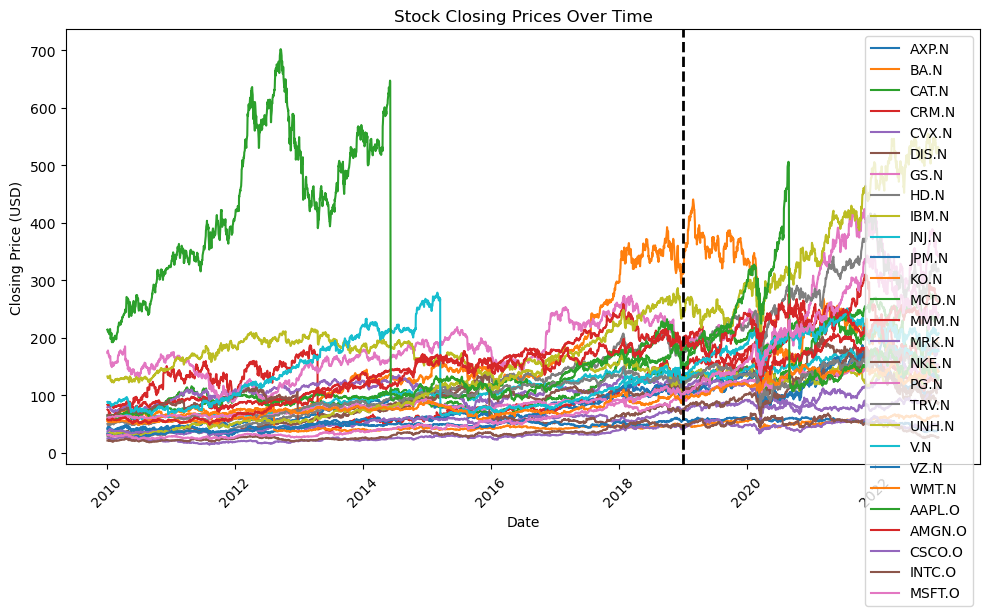

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file, ensuring the first column is used as the Date index and parsed as a datetime object
data = pd.read_excel('D:\\RL\\pro\\Benchmarking-Strategies-for-Asset-Allocation\\data.xlsx', index_col=0)
data.index = pd.to_datetime(data.index)

# Define your tickers list here
tickers_with_suffix = data.columns.tolist()  # List all column names as tickers

# Define the split date for the vertical line
split_date = pd.to_datetime("2019-01-03")

# Plotting the data
plt.figure(figsize=(10, 6))
for ticker in tickers_with_suffix:
    plt.plot(data.index, data[ticker], label=ticker)

# Adding a vertical line at the split date
plt.axvline(x=split_date, color='black', linestyle='--', lw=2)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Stock Closing Prices Over Time")
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Rotate date labels on x-axis for better readability
plt.xticks(rotation=45)

plt.show()



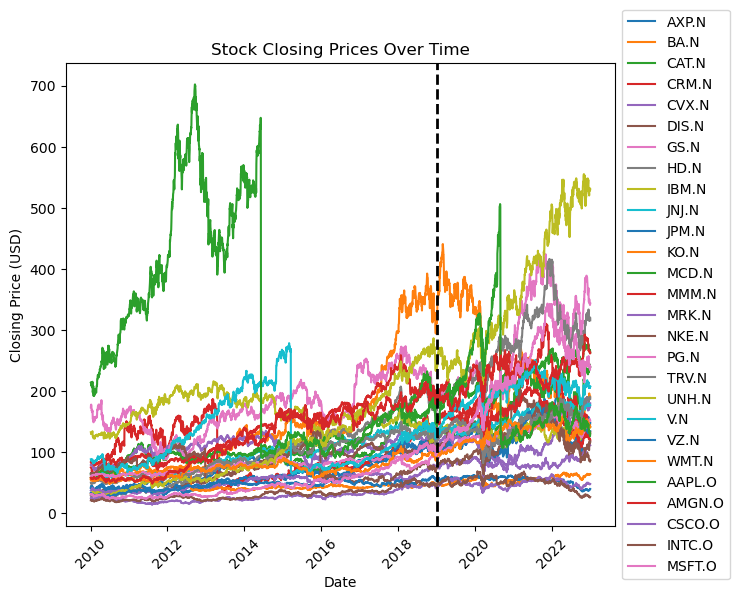

In [86]:
plt.figure(figsize=(10, 6))
for ticker in tickers_with_suffix:
    plt.plot(data.index, data[ticker], label=ticker)

plt.axvline(x=split_date, color='black', linestyle='--', lw=2)

# Place the legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Stock Closing Prices Over Time")
plt.tight_layout(rect=[0, 0, 0.75, 1]) # Adjust the rect to make room for the legend

plt.xticks(rotation=45) # Rotate date labels for better readability

plt.show()

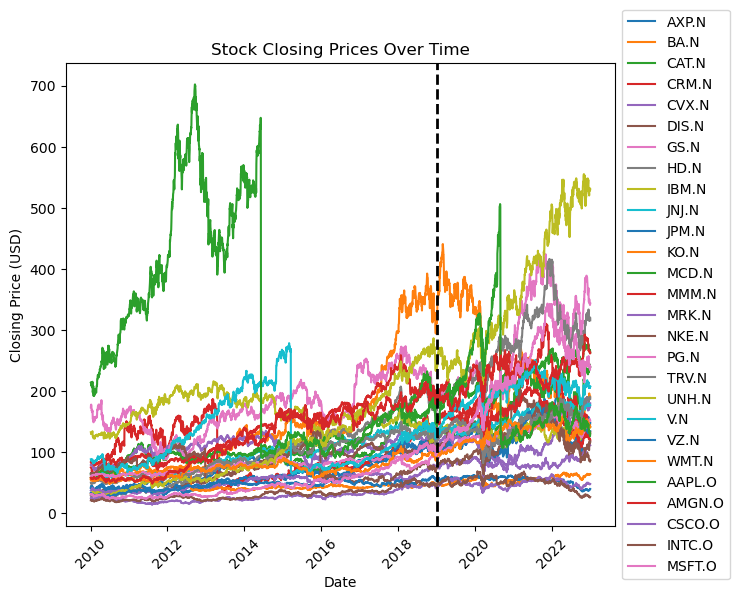

In [104]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a color palette
color_palette = ListedColormap([
    '#1f77b4', # muted blue
    '#ff7f0e', # safety orange
    '#2ca02c', # cooked asparagus green
    '#d62728', # brick red
    '#9467bd', # muted purple
    '#8c564b', # chestnut brown
    '#e377c2', # raspberry yogurt pink
    '#7f7f7f', # middle gray
    '#bcbd22', # curry yellow-green
    '#17becf'  # blue-teal
])

# Set the color cycle to the defined palette
plt.rc('axes', prop_cycle=(cycler('color', color_palette.colors)))

plt.figure(figsize=(10, 6))

for ticker in tickers_with_suffix:
    plt.plot(data.index, data[ticker], label=ticker)

plt.axvline(x=split_date, color='black', linestyle='--', lw=2)

# Place the legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Stock Closing Prices Over Time")
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the rect to make room for the legend

plt.xticks(rotation=45)  # Rotate date labels for better readability

# Save the figure as a vector graphic
output_filename = 'stock_prices_vector.svg'
plt.savefig(output_filename, format='svg', bbox_inches='tight')

plt.show()




In [105]:
import os
print("The current working directory is:", os.getcwd())


The current working directory is: d:\RL\pro\Benchmarking-Strategies-for-Asset-Allocation\PyPortfolioOpt\cookbook


# Evaluating models

## Deep Reinfrocement Learning

In [12]:
import numpy as np
import random
from deepRL import StockEnvTrade, train, DRL_prediction
from stable_baselines3.common.vec_env import DummyVecEnv

In [10]:
rebalance_period = 1
re_df = data.iloc[::rebalance_period, :]

train_re_df = data.iloc[::rebalance_period, :]
test_re_df = data.iloc[::rebalance_period, :]

# 查看确保日期索引是否仍然保留
print(train_re_df.index)
split_date = pd.Timestamp('2019-01-03')  # 替换为您的具体日期

train_re_df = data[data.index < split_date]
test_re_df = data[data.index >= split_date]
test_re_df

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=3272, freq=None)


AXP.N    BA.N   CAT.N   CRM.N   CVX.N   DIS.N    GS.N    HD.N  \
Date                                                                         
2019-01-03   93.43  310.90  121.51  130.40  108.57  106.33  169.51  168.61   
2019-01-04   97.64  327.08  128.15  137.96  110.82  109.61  175.05  173.62   
2019-01-07   98.17  328.11  128.23  142.22  112.26  110.56  176.02  177.04   
2019-01-08   98.65  340.53  129.77  145.72  111.77  111.42  175.37  177.89   
2019-01-09   98.83  343.83  130.27  145.99  113.27  112.67  176.47  179.73   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2022-12-23  147.02  189.06  239.87  129.44  177.40   88.01  345.51  318.73   
2022-12-27  146.39  189.40  243.14  130.66  179.63   86.37  341.97  319.55   
2022-12-28  144.01  188.38  239.38  128.47  176.98   84.17  340.87  315.73   
2022-12-29  147.32  188.91  240.20  132.54  178.32   87.18  343.43  320.41   
2022-12-30  147.75  190.49  239.56  132.59  179.49   86.88  343.38  315.86   

             IBM.N   JNJ.N  ...   TRV.N   UNH.N     V.N   VZ.N   WMT.N  \
Date                        ...                                          
2019-01-03  112.91  125.72  ...  115.26  236.85  128.13  56.22   92.86   
2019-01-04  117.32  127.83  ...  118.68  239.62  133.65  56.36   93.44   
2019-01-07  118.15  127.01  ...  118.30  240.08  136.06  56.72   94.54   
2019-01-08  119.83  129.96  ...  117.84  243.29  136.80  58.38   95.20   
2019-01-09  120.69  128.93  ...  118.68  243.64  138.41  57.05   94.89   
...            ...     ...  ...     ...     ...     ...    ...     ...   
2022-12-23  141.65  177.48  ...  189.48  531.31  205.83  38.41  143.77   
2022-12-27  142.42  177.43  ...  190.48  531.99  206.29  39.25  143.81   
2022-12-28  140.02  176.66  ...  188.13  528.45  204.99  38.81  141.29   
2022-12-29  141.06  177.56  ...  189.44  529.88  208.06  39.26  142.15   
2022-12-30  140.89  176.65  ...  187.49  530.18  207.76  39.40  141.79   

            AAPL.O  AMGN.O  CSCO.O  INTC.O  MSFT.O  
Date                                                
2019-01-03  142.19  188.98   41.07   44.49   97.40  
2019-01-04  148.26  195.44   42.92   47.22  101.93  
2019-01-07  147.93  198.07   43.21   47.44  102.06  
2019-01-08  150.75  200.61   43.56   47.74  102.80  
2019-01-09  153.31  200.37   43.32   48.01  104.27  
...            ...     ...     ...     ...     ...  
2022-12-23  131.86  263.92   47.48   26.09  238.73  
2022-12-27  130.03  263.39   47.53   25.94  236.96  
2022-12-28  126.04  261.42   47.07   25.54  234.53  
2022-12-29  129.61  263.16   47.50   26.21  241.01  
2022-12-30  129.93  262.64   47.64   26.43  239.82  

[1007 rows x 27 columns]

In [20]:
timesteps = 10000
runs = 10
policy = "MlpPolicy"
length = test_re_df.shape[0]
stocks = test_re_df.shape[1]

### PPO

In [21]:
algo = "PPO"
Cumulative_returns_daily_drl_ppo = np.zeros([runs, length])
portfolio_weights_ppo = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ppo[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_ppo[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo[i]),axis=1)
    Cumulative_returns_daily_drl_ppo[i] = (1+return_stocks_ppo).cumprod()
    i = i+1

c:\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\anaconda3\Lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  0.12751148541768392  minutes
Training time:  0.12740716139475505  minutes
Training time:  0.127281387646993  minutes
Training time:  0.1284632960955302  minutes
Training time:  0.1273227055867513  minutes
Training time:  0.12654884258906046  minutes
Training time:  0.12727192640304566  minutes
Training time:  0.12739157676696777  minutes
Training time:  0.12687206268310547  minutes
Training time:  0.1277096470197042  minutes
Training time:  0.12712138891220093  minutes
Training time:  0.12762231429417928  minutes


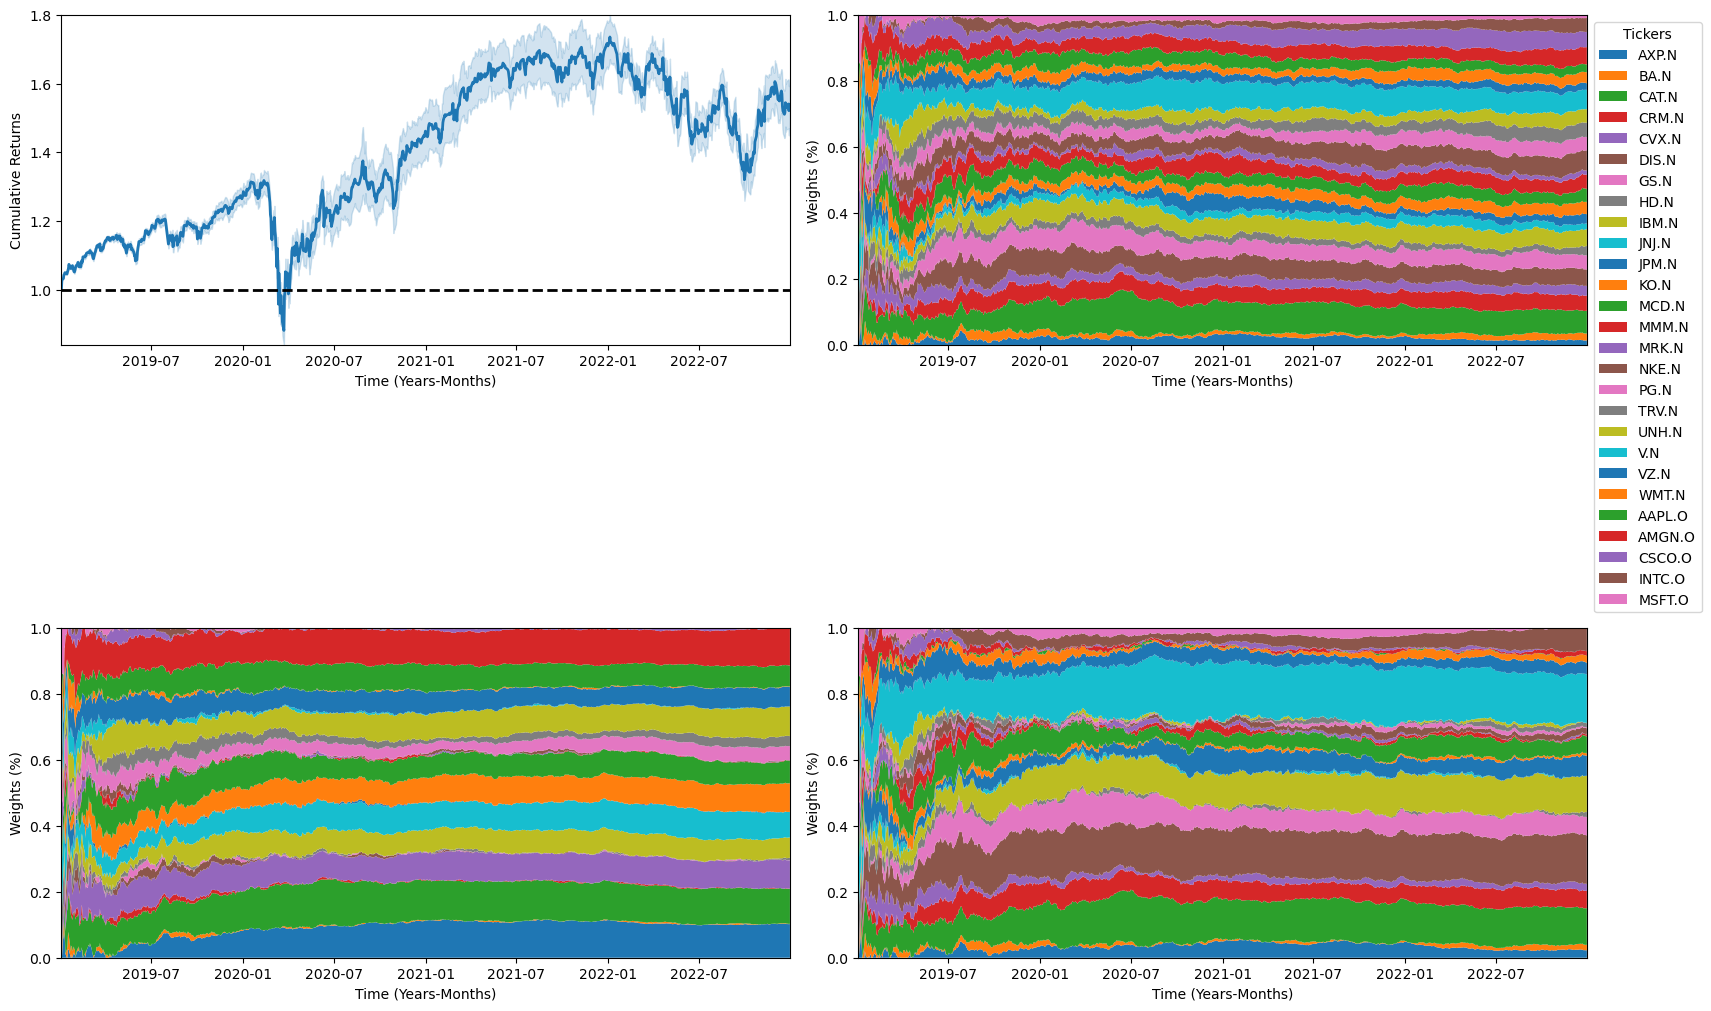

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ppo_mean = np.mean(np.array(Cumulative_returns_daily_drl_ppo),axis=0)
ppo_std = np.std(np.array(Cumulative_returns_daily_drl_ppo),axis=0)

axs[0,0].plot(test_re_df.index, ppo_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ppo_mean - ppo_std, ppo_mean + ppo_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = np.mean(np.array(portfolio_weights_ppo),axis=0)
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O']
, labels=tickers)
#axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tickers')


portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O']
, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O']

, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### A2C

In [23]:
algo = "A2C"
Cumulative_returns_daily_drl_a2c = np.zeros([runs, length])
portfolio_weights_a2c = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_a2c[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_a2c[i]) 
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c[i]),axis=1)
    Cumulative_returns_daily_drl_a2c[i] = (1+return_stocks_a2c).cumprod()
    i = i+1

c:\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\anaconda3\Lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  0.1290884494781494  minutes
Training time:  0.13124808470408122  minutes
Training time:  0.12509570121765137  minutes
Training time:  0.12482143640518188  minutes
Training time:  0.12513185342152913  minutes
Training time:  0.12495437860488892  minutes
Training time:  0.1241048534711202  minutes
Training time:  0.1245208223660787  minutes
Training time:  0.12550538778305054  minutes
Training time:  0.12476317087809245  minutes
Training time:  0.124943478902181  minutes


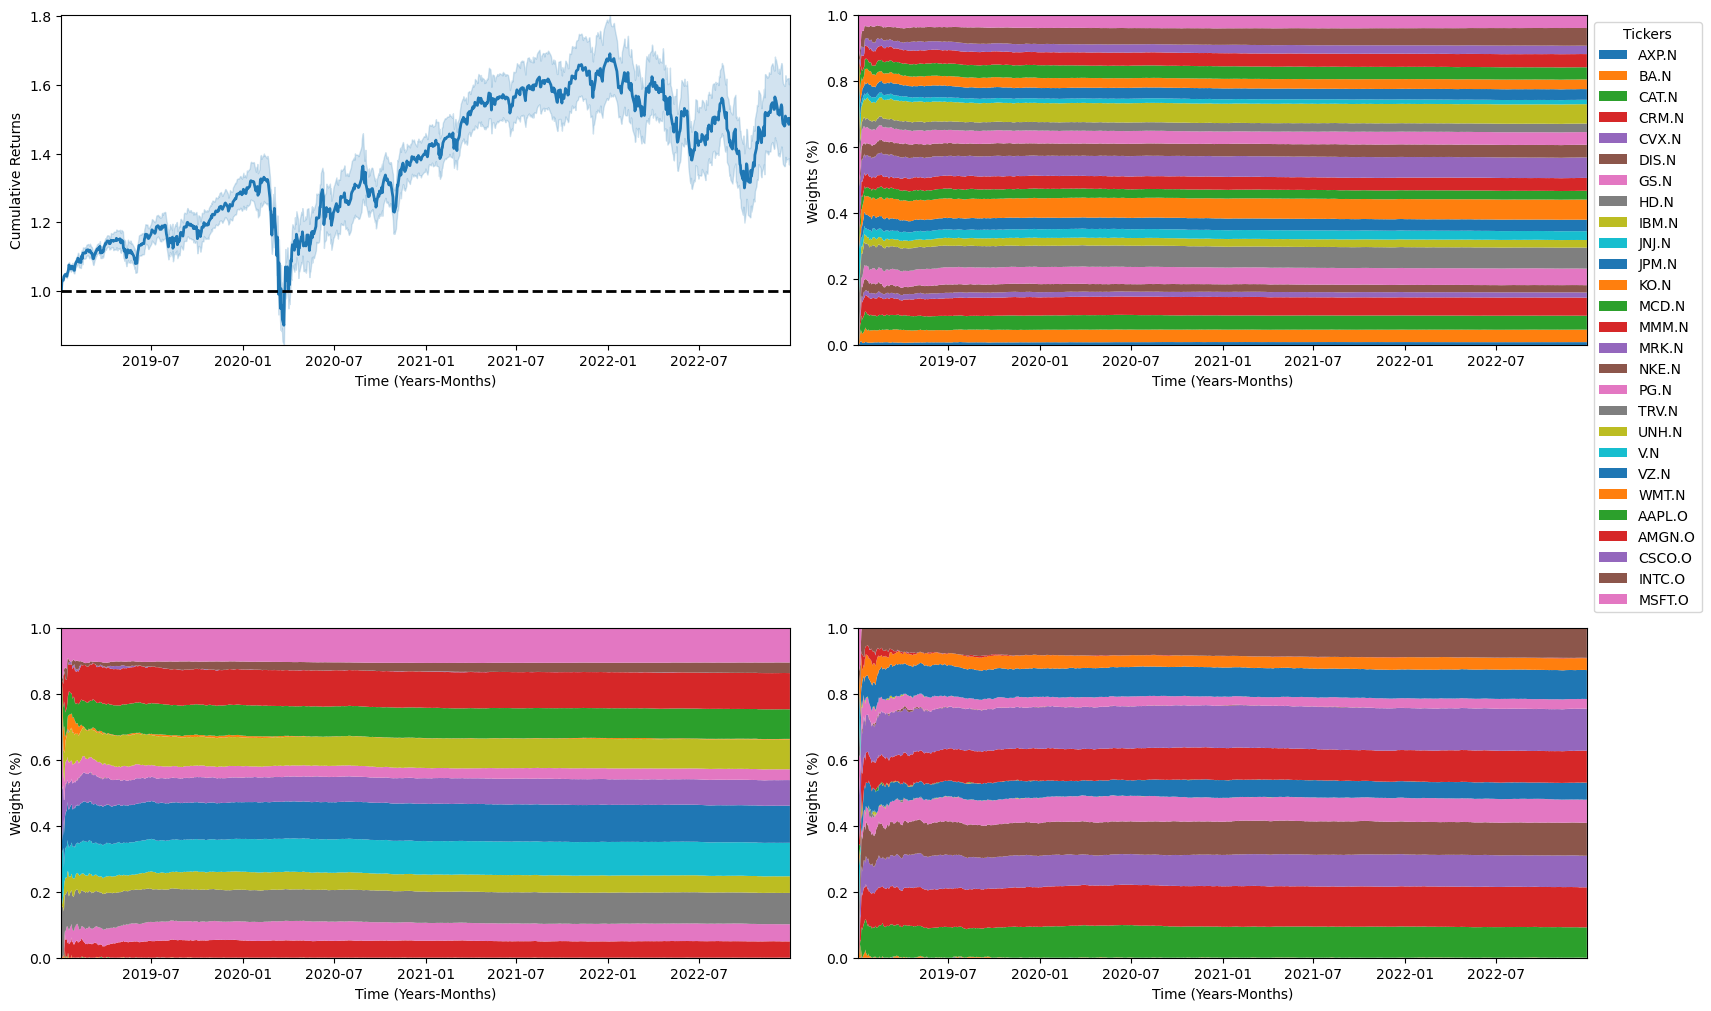

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

a2c_mean = np.mean(np.array(Cumulative_returns_daily_drl_a2c),axis=0)
a2c_std = np.std(np.array(Cumulative_returns_daily_drl_a2c),axis=0)

axs[0,0].plot(test_re_df.index, a2c_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, a2c_mean - a2c_std, a2c_mean + a2c_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = np.mean(np.array(portfolio_weights_a2c),axis=0)
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tickers')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### DDPG

In [25]:
algo = "DDPG"
Cumulative_returns_daily_drl_ddpg = np.zeros([runs, length])
portfolio_weights_ddpg = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ddpg[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_ddpg[i]) 
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg[i]),axis=1)
    Cumulative_returns_daily_drl_ddpg[i] = (1+return_stocks_ddpg).cumprod()
    i = i+1

c:\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\anaconda3\Lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  2.441421953837077  minutes
Training time:  2.4515705982844036  minutes
Training time:  2.444328558444977  minutes
Training time:  2.3528239250183107  minutes
Training time:  2.4253270427385965  minutes
Training time:  2.3824281454086305  minutes
Training time:  2.3935890793800354  minutes
Training time:  2.3919341564178467  minutes
Training time:  2.4263992428779604  minutes
Training time:  2.4319576541582744  minutes
Training time:  2.4432786266009012  minutes
Training time:  2.4450247009595234  minutes
Training time:  2.397140963872274  minutes
Training time:  2.3819106340408327  minutes
Training time:  2.388505486647288  minutes
Training time:  2.4078728278477985  minutes
Training time:  2.3812191327412924  minutes


In [26]:
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(model, train_env, n_eval_episodes=10, render=False)
train_env.close()
mean_reward, std_reward

c:\anaconda3\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(100262106.20034695, 0.0)

In [53]:
Cumulative_returns_daily_drl_ddpg

array([[1.        , 1.03536579, 1.04103599, ..., 1.51108585, 1.53277841,
        1.52868597],
       [1.        , 1.03639031, 1.04558002, ..., 1.50830568, 1.52364383,
        1.52103383],
       [1.        , 1.03670618, 1.04255301, ..., 1.39687751, 1.41581111,
        1.4175925 ],
       ...,
       [1.        , 1.03037012, 1.03542072, ..., 1.57863242, 1.59680299,
        1.59387508],
       [1.        , 1.03546531, 1.04231095, ..., 1.53466155, 1.55019843,
        1.54844608],
       [1.        , 1.03331896, 1.03731105, ..., 1.26451696, 1.2787494 ,
        1.27918493]])

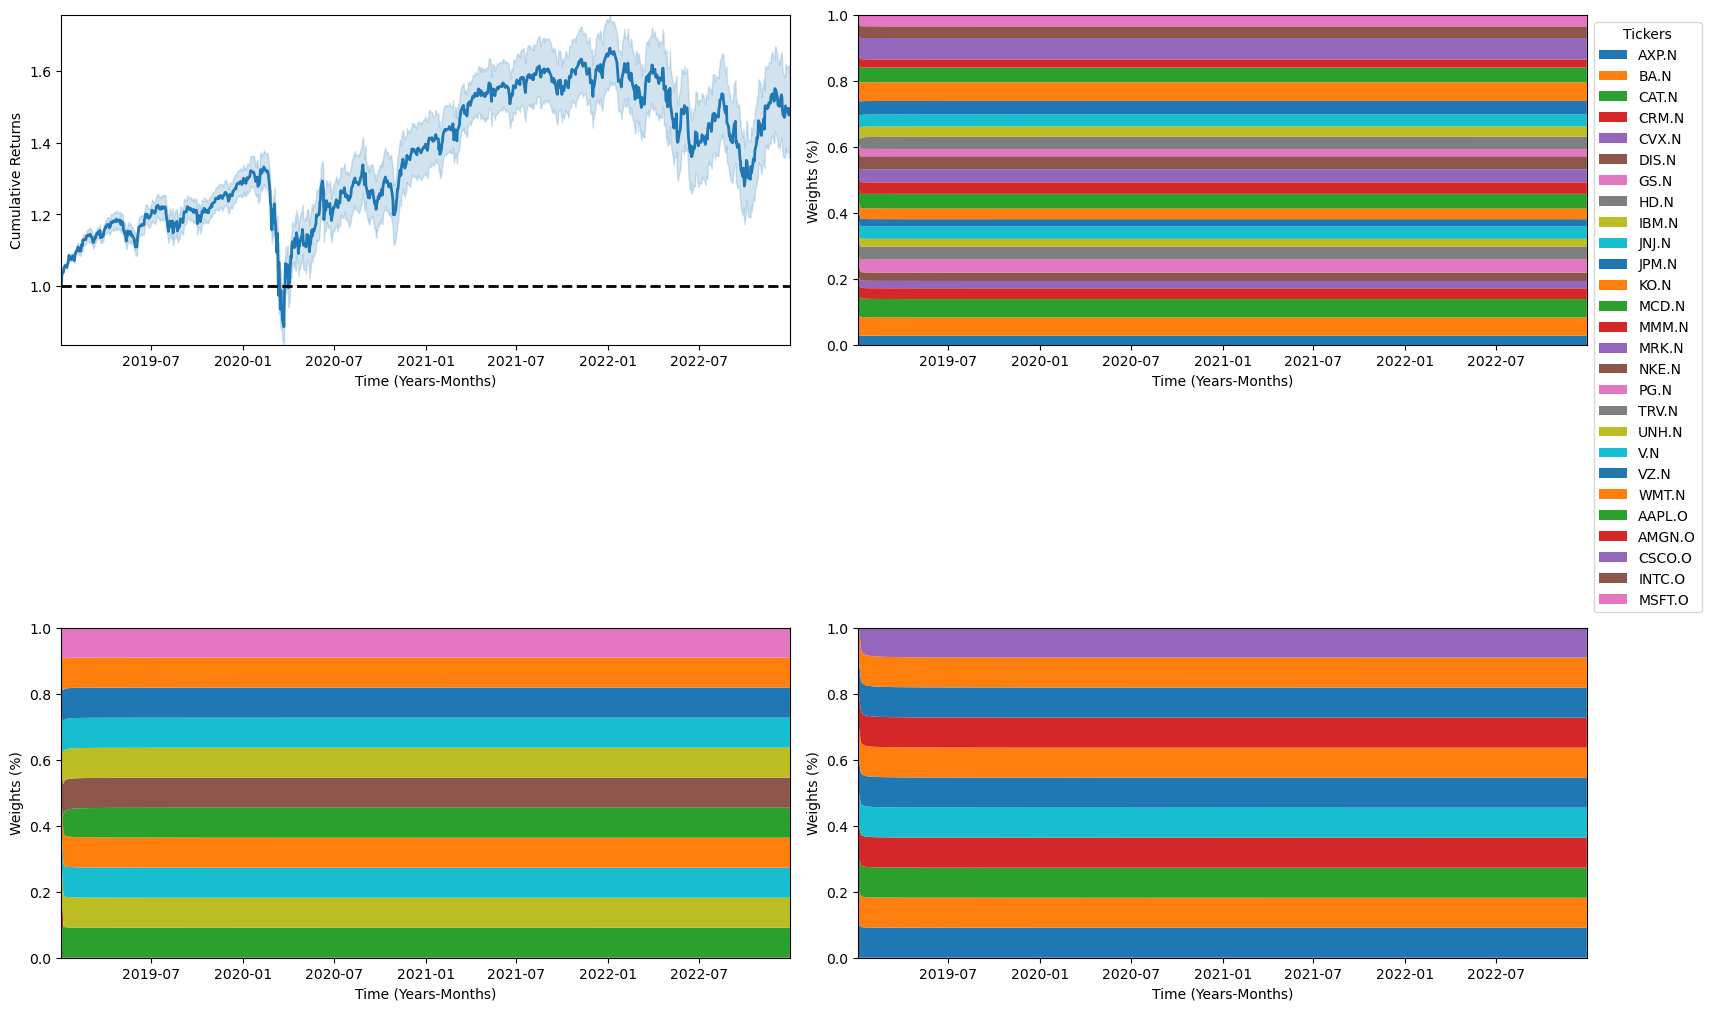

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ddpg_mean = np.mean(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)
ddpg_std = np.std(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)

axs[0,0].plot(test_re_df.index, ddpg_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ddpg_mean - ddpg_std, ddpg_mean + ddpg_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = np.mean(np.array(portfolio_weights_ddpg),axis=0)
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tickers')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### SAC

In [29]:
algo = "SAC"
Cumulative_returns_daily_drl_sac = np.zeros([runs, length])
portfolio_weights_sac = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_sac[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_sac[i]) 
    cont = cont +1
    if check != length:
        continue
    
    return_stocks = test_re_df.pct_change()
    return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac[i]),axis=1)
    Cumulative_returns_daily_drl_sac[i] = (1+return_stocks_sac).cumprod()
    i = i+1

c:\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\anaconda3\Lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  3.2359038670857747  minutes
Training time:  3.2432540814081827  minutes
Training time:  3.2078423341115316  minutes
Training time:  3.1596200704574584  minutes
Training time:  3.195292627811432  minutes
Training time:  3.2226102630297344  minutes
Training time:  3.208509882291158  minutes
Training time:  3.1709397554397585  minutes
Training time:  3.1907986640930175  minutes
Training time:  3.2543480515480043  minutes
Training time:  3.185011430581411  minutes
Training time:  3.1943801403045655  minutes
Training time:  29.056271783510844  minutes
Training time:  3.3441668351491294  minutes


array([1.        , 1.02948301, 1.03379504, ..., 1.5264142 , 1.54422084,
       1.54187563])

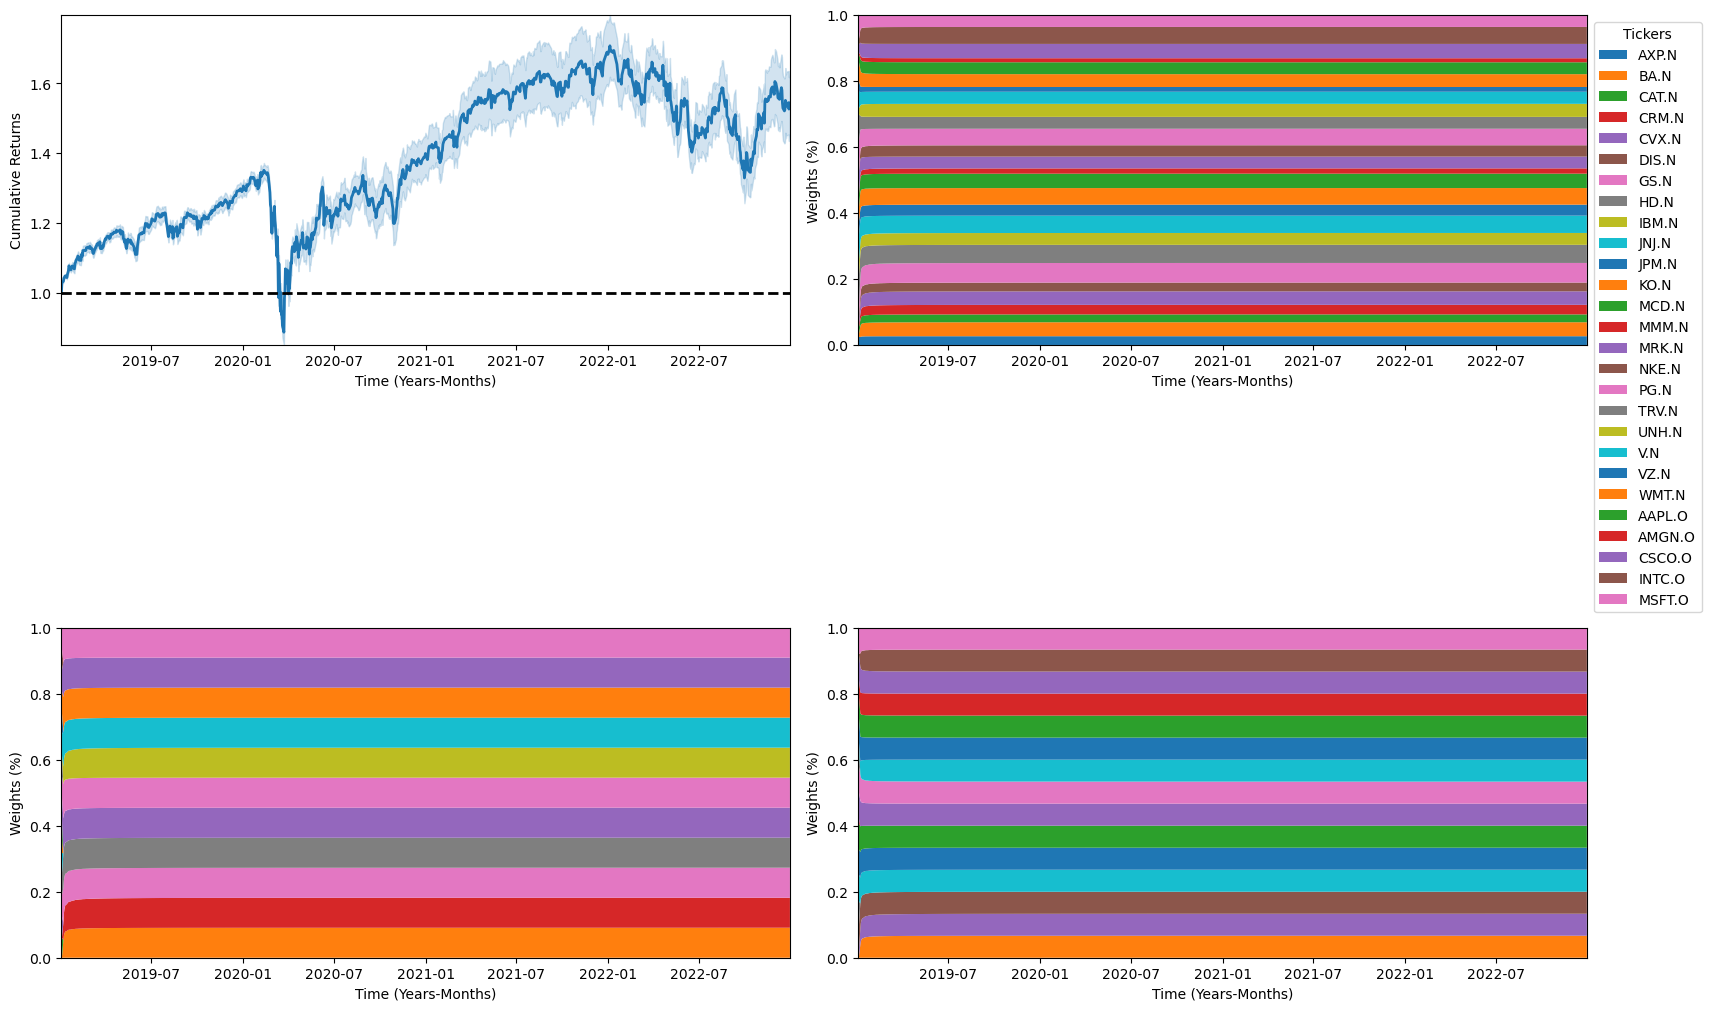

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

sac_mean = np.mean(np.array(Cumulative_returns_daily_drl_sac),axis=0)
sac_std = np.std(np.array(Cumulative_returns_daily_drl_sac),axis=0)

axs[0,0].plot(test_re_df.index, sac_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, sac_mean - sac_std, sac_mean + sac_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = np.mean(np.array(portfolio_weights_sac),axis=0)
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tickers')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')
sac_mean

### TD3

In [31]:
algo = "TD3"
Cumulative_returns_daily_drl_td3 = np.zeros([runs, length])
portfolio_weights_td3 = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_td3[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_td3[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3[i]),axis=1)
    Cumulative_returns_daily_drl_td3[i] = (1+return_stocks_td3).cumprod()
    i = i+1

c:\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\anaconda3\Lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  2.764579180876414  minutes
Training time:  2.4097606619199117  minutes
Training time:  2.576867234706879  minutes
Training time:  2.494978137811025  minutes
Training time:  2.5108680804570516  minutes
Training time:  2.419854994614919  minutes
Training time:  2.526302413145701  minutes
Training time:  2.816531244913737  minutes
Training time:  2.6747000217437744  minutes
Training time:  2.8019895911216737  minutes
Training time:  2.827549187342326  minutes
Training time:  2.678753999869029  minutes
Training time:  2.599180579185486  minutes
Training time:  2.679494877656301  minutes


array([1.        , 1.03250004, 1.03748533, ..., 1.49325307, 1.50972166,
       1.50739263])

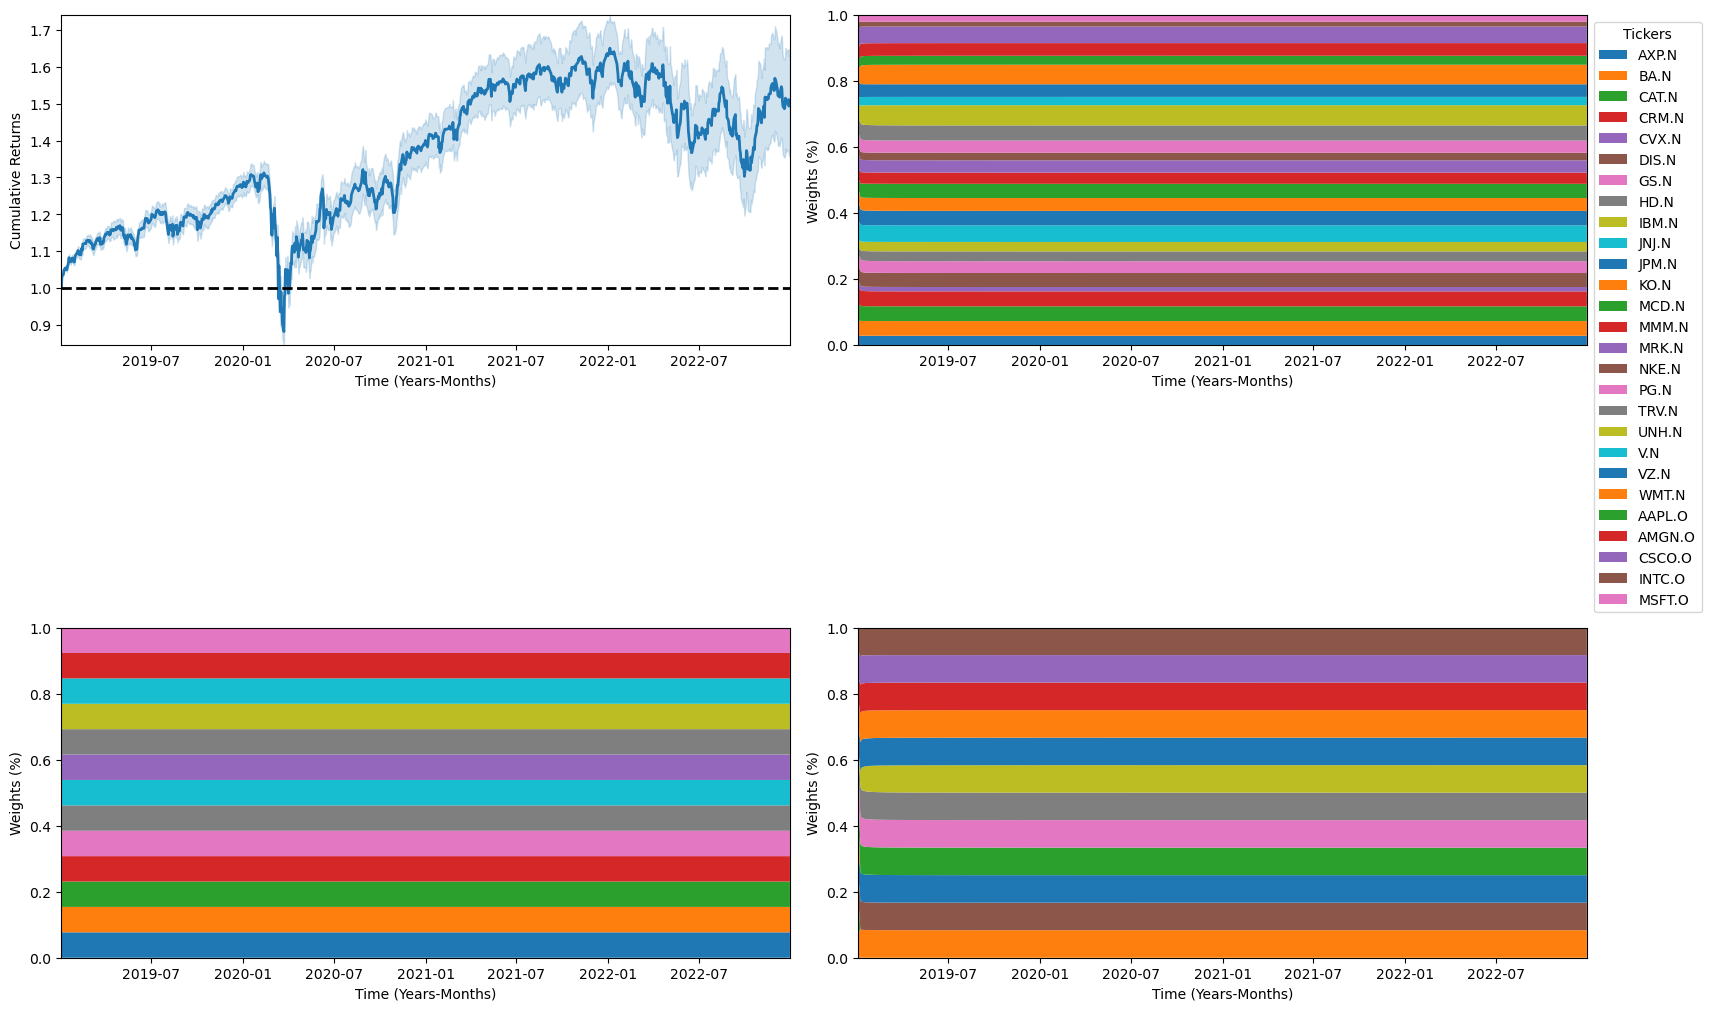

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

td3_mean = np.mean(np.array(Cumulative_returns_daily_drl_td3),axis=0)
td3_std = np.std(np.array(Cumulative_returns_daily_drl_td3),axis=0)

axs[0,0].plot(test_re_df.index, td3_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, td3_mean - td3_std, td3_mean + td3_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = np.mean(np.array(portfolio_weights_td3),axis=0)
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tickers')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')
td3_mean

## Traditional approaches

In [33]:


from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import riskfolio as rp

In [34]:
# working days in a year 252
window = 50
start = len(train_re_df)-window
data = re_df.iloc[start:]
data = data.reset_index(drop=True)

### Min-Variance Portfolio Allocation

In [35]:
portfolio_weights_min_var = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var.shape[0]):    
    sel = data.iloc[i:window+i]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True,
        )

    portfolio_weights_min_var[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

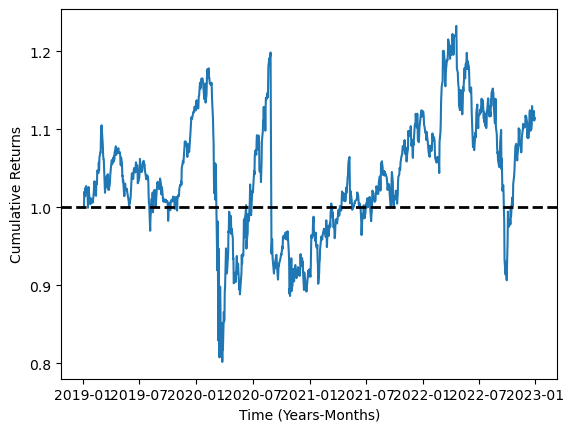

In [36]:
return_stocks = test_re_df.pct_change()
return_stocks_min_var = np.sum(return_stocks.multiply(portfolio_weights_min_var),axis=1)
Cumulative_returns_daily_min_var = (1+return_stocks_min_var).cumprod()
plt.plot(Cumulative_returns_daily_min_var)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

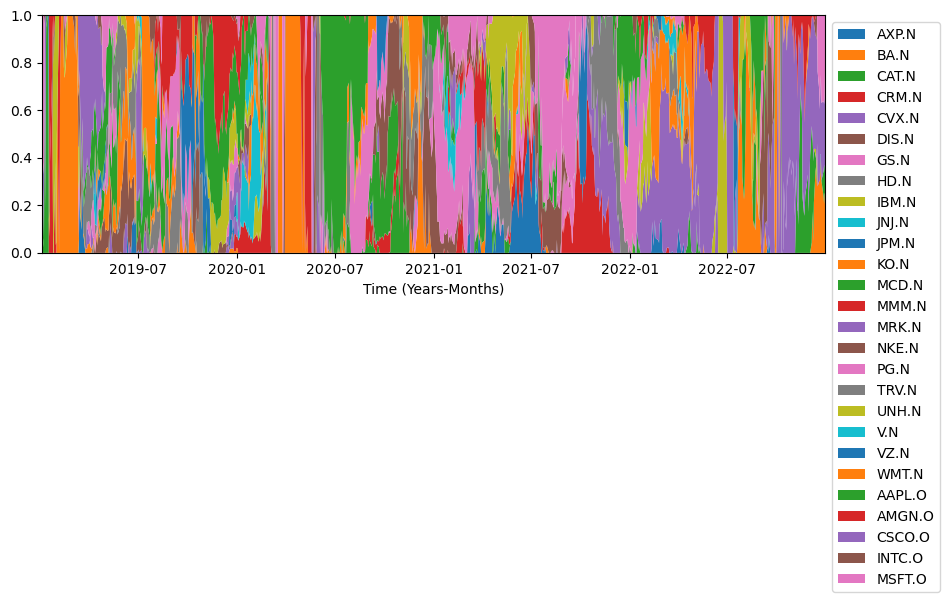

In [42]:
df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
plt.stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 调整布局以为图例腾出空间
plt.tight_layout(rect=[0, 0, 1.5, 1])

### Min volatility

In [43]:
portfolio_weights_min_vol = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol.shape[0]):    
    sel = data.iloc[i:window+i]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)  
    weights = ef.min_volatility() 
   
    portfolio_weights_min_vol[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

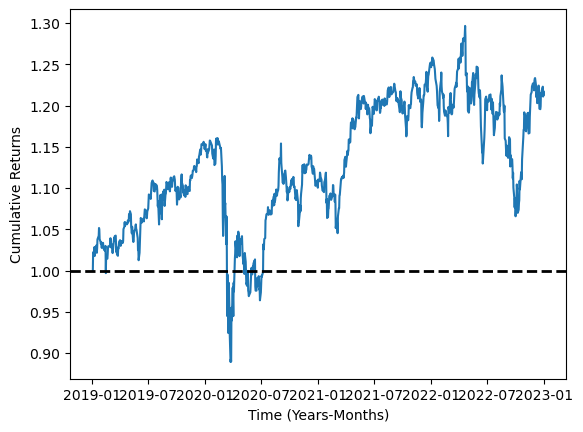

In [44]:
return_stocks_min_vol = np.sum(return_stocks.multiply(portfolio_weights_min_vol),axis=1)
Cumulative_returns_daily_min_vol = (1+return_stocks_min_vol).cumprod()
plt.plot(Cumulative_returns_daily_min_vol)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

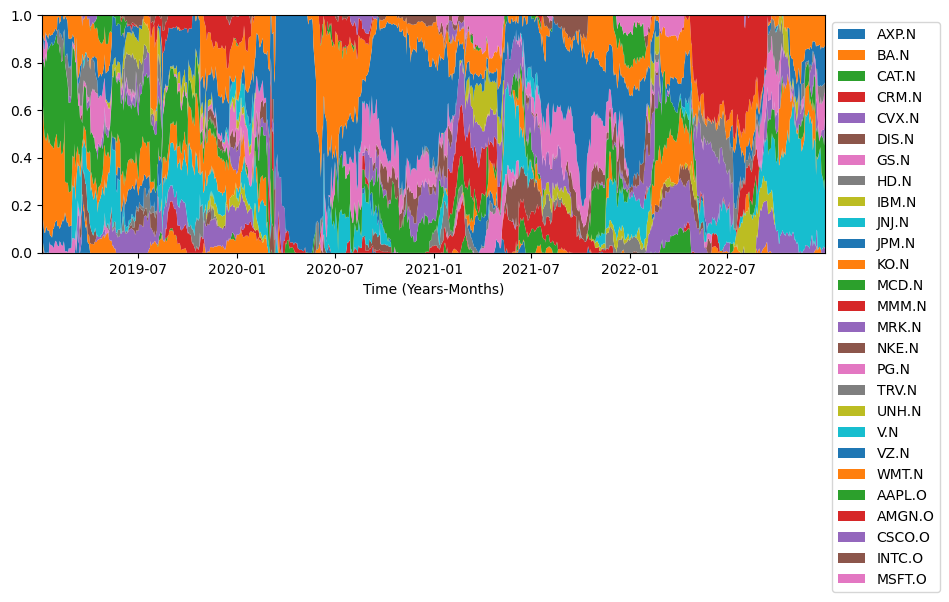

In [46]:
df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
plt.stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1.5, 1])

### Risk Parity

In [47]:
portfolio_weights_risk = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_risk.shape[0]):    
    sel = data.iloc[i:window+i]
   
    # Building the portfolio object
    port = rp.Portfolio(returns=sel)

    # Calculating optimal portfolio
    # Select method and estimate input parameters:
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    model='Classic' # Could be Classic (historical) or FM (Factor Model)
    rm = 'MV' # Risk measure used, this time will be variance
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    b = None # Risk contribution constraints vector
    weights = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
   
    portfolio_weights_risk[idx]=np.squeeze(np.array(weights)) 
    idx +=1  

c:\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another 

Text(0.5, 0, 'Time (Years-Months)')

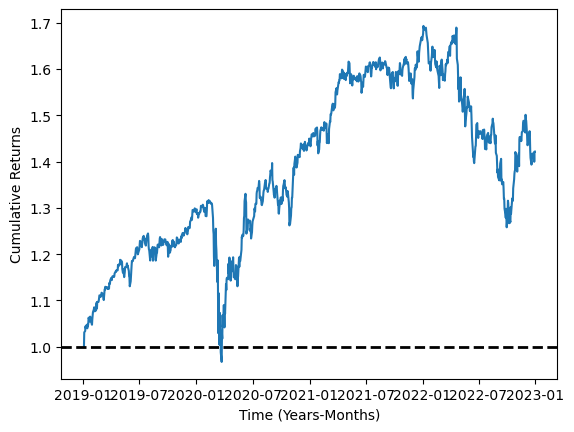

In [48]:
return_stocks = test_re_df.pct_change()
return_stocks_risk = np.sum(return_stocks.multiply(portfolio_weights_risk),axis=1)
Cumulative_returns_daily_risk = (1+return_stocks_risk).cumprod()
plt.plot(Cumulative_returns_daily_risk)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

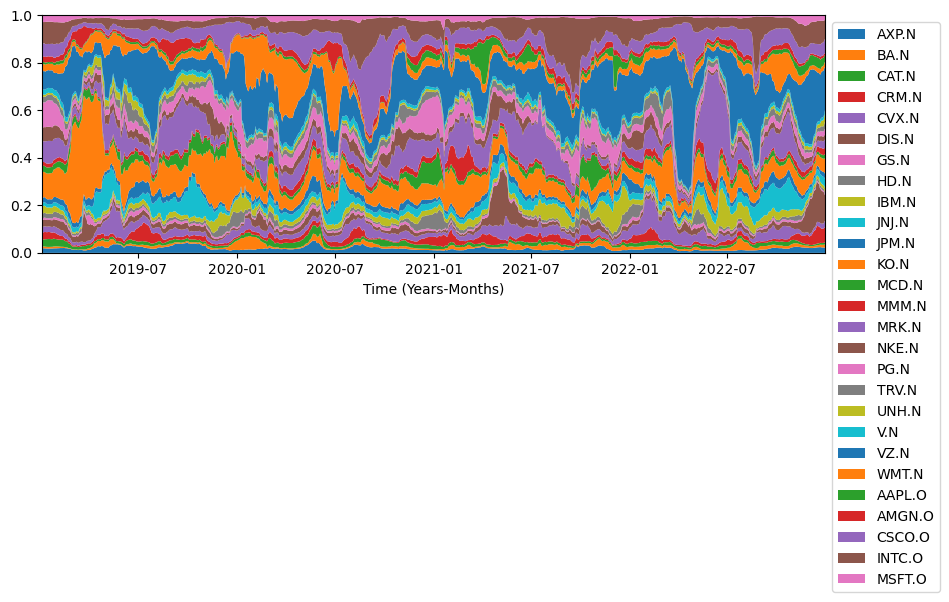

In [50]:
df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
plt.stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1.5, 1])

### Equal weighting

In [54]:
portfolio_weights_equal = np.ones([test_re_df.shape[0],test_re_df.shape[1]])/test_re_df.shape[1]

Text(0.5, 0, 'Time (Years-Months)')

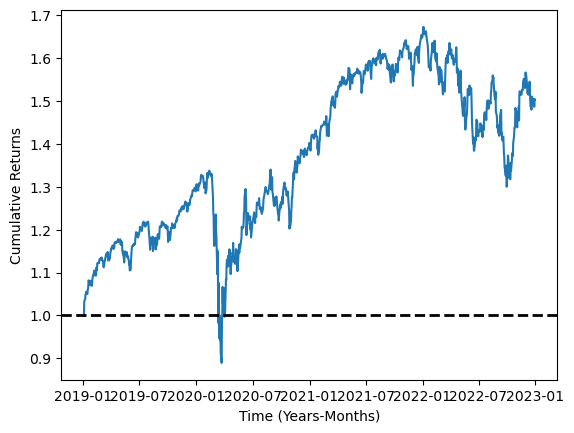

In [55]:
return_stocks = test_re_df.pct_change()
return_stocks_equal = np.sum(return_stocks.multiply(portfolio_weights_equal),axis=1)
Cumulative_returns_daily_equal = (1+return_stocks_equal).cumprod()
plt.plot(Cumulative_returns_daily_equal)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

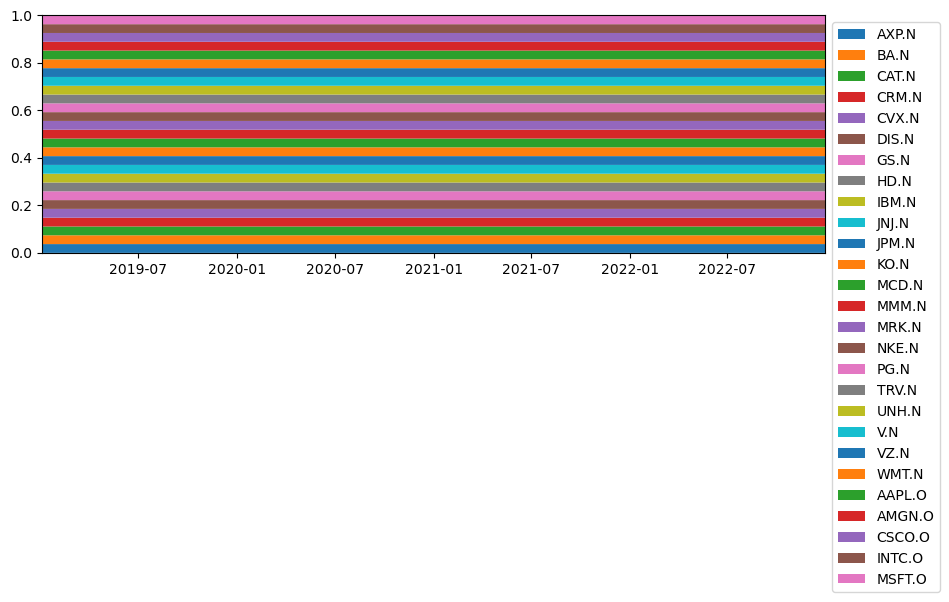

In [58]:
df = pd.DataFrame (portfolio_weights_equal, index = test_re_df.index, columns = tickers)
plt.stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1.5, 1])

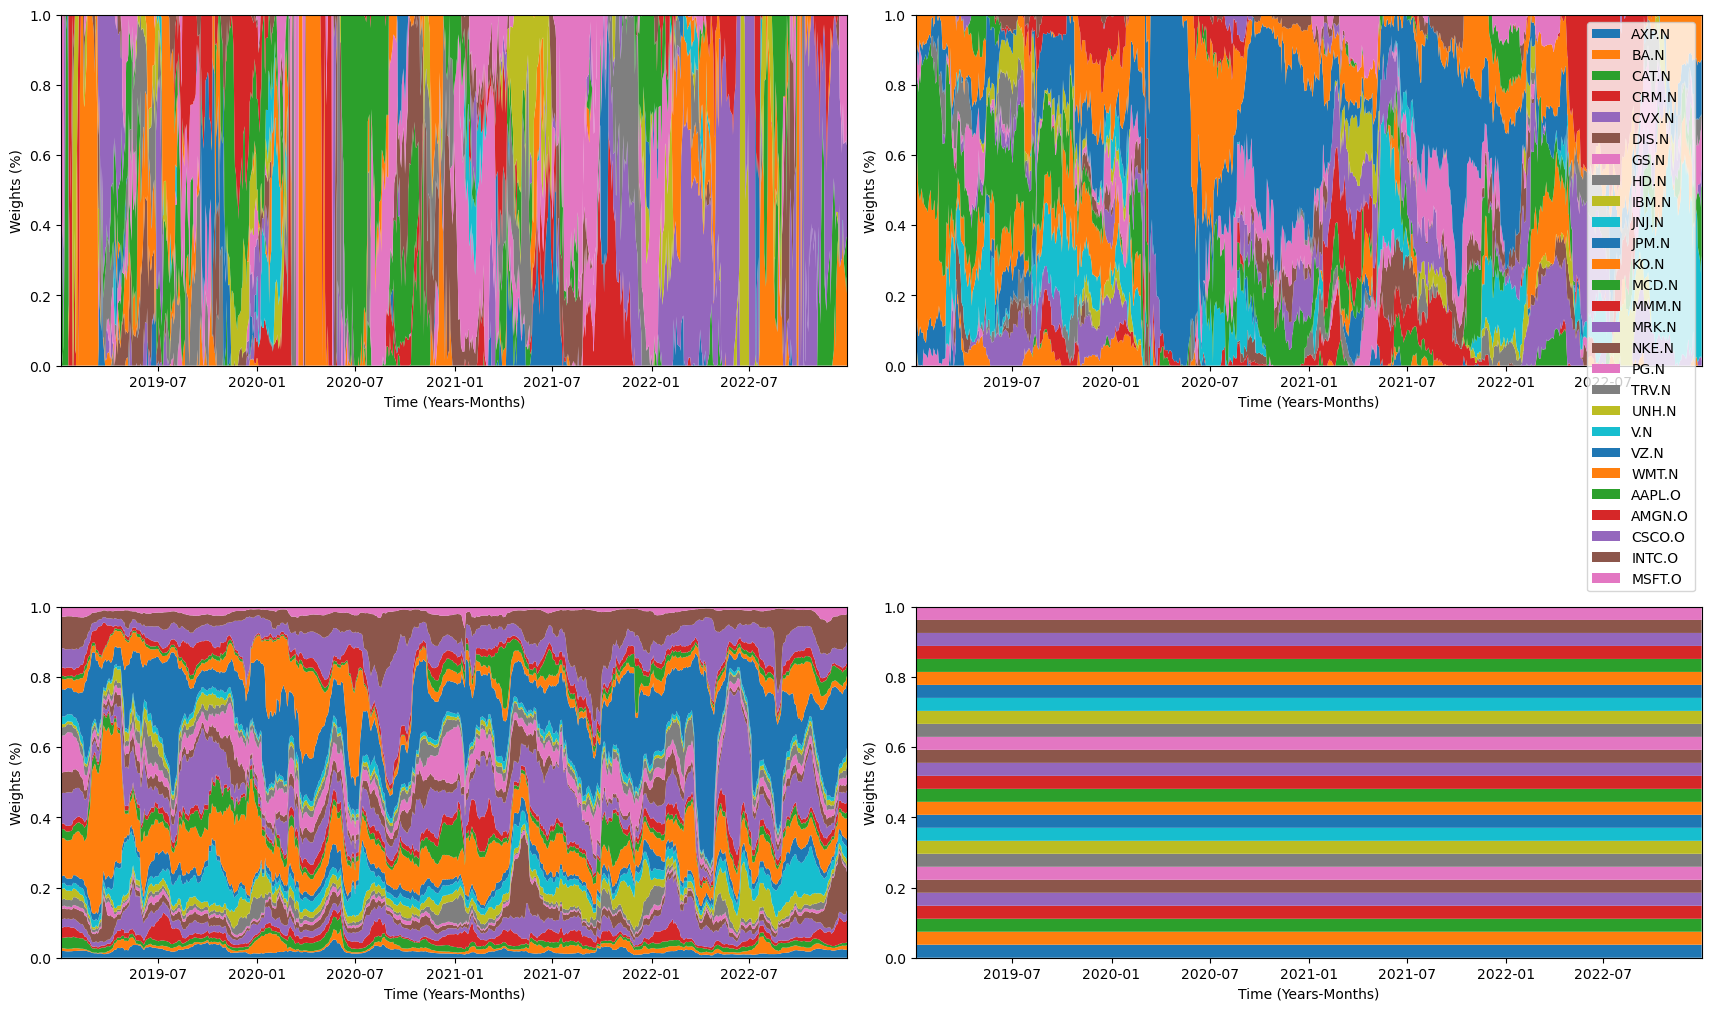

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
axs[0,0].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'])
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].set_ylabel("Weights (%)")
axs[0,0].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'])
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_equal, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'])
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")


plt.savefig('traditional0.png',bbox_inches='tight')

### Hierarchical Risk Parity

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.5.5'

In [93]:
from pypfopt import HRPOpt

hrp = HRPOpt(rets)
hrp.optimize()
portfolio_weights_hierarchical = hrp.clean_weights()
portfolio_weights_hierarchical

OrderedDict([('AXP.N', 0.02012),
             ('BA.N', 0.02145),
             ('CAT.N', 0.01439),
             ('CRM.N', 0.01476),
             ('CVX.N', 0.03708),
             ('DIS.N', 0.02926),
             ('GS.N', 0.01287),
             ('HD.N', 0.03401),
             ('IBM.N', 0.04172),
             ('JNJ.N', 0.05738),
             ('JPM.N', 0.01357),
             ('KO.N', 0.05842),
             ('MCD.N', 0.09226),
             ('MMM.N', 0.03074),
             ('MRK.N', 0.03396),
             ('NKE.N', 0.02369),
             ('PG.N', 0.07329),
             ('TRV.N', 0.03384),
             ('UNH.N', 0.0356),
             ('V.N', 0.02985),
             ('VZ.N', 0.06159),
             ('WMT.N', 0.09317),
             ('AAPL.O', 0.02309),
             ('AMGN.O', 0.02969),
             ('CSCO.O', 0.0254),
             ('INTC.O', 0.03316),
             ('MSFT.O', 0.02562)])

Text(0.5, 0, 'Time (Years-Months)')

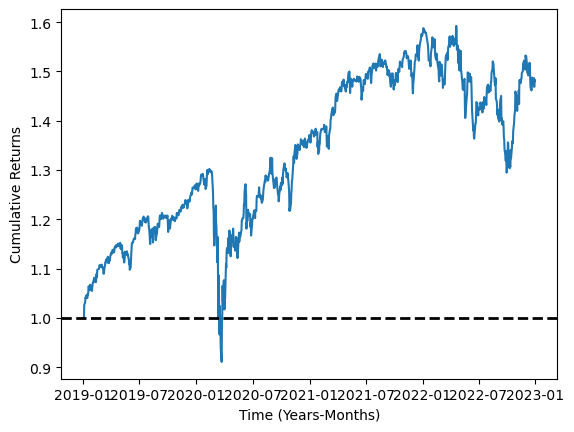

In [94]:
return_stocks = test_re_df.pct_change()
return_stocks_hierarchical = np.sum(return_stocks.multiply(portfolio_weights_hierarchical),axis=1)
Cumulative_returns_daily_hierarchical = (1+return_stocks_hierarchical).cumprod()
plt.plot(Cumulative_returns_daily_hierarchical)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

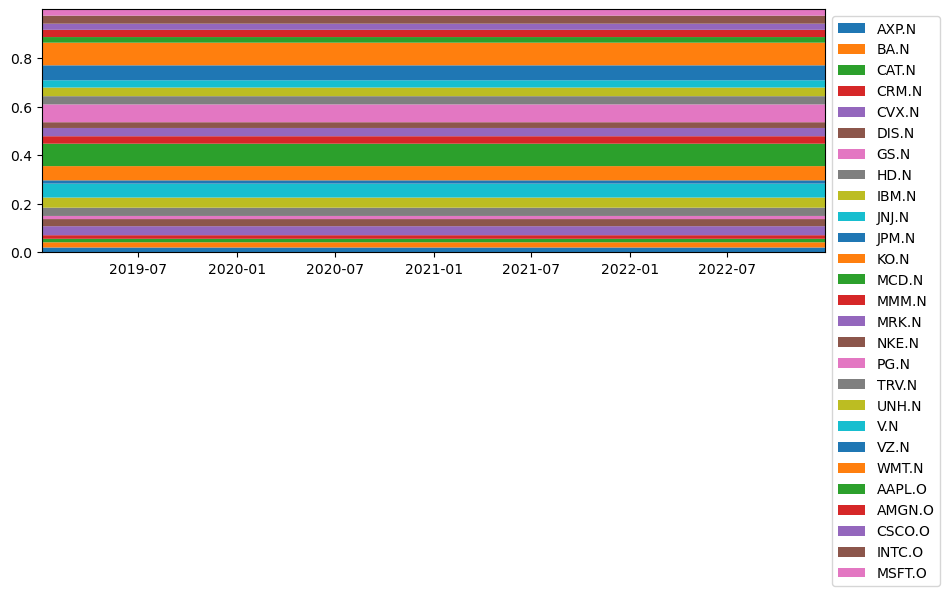

In [95]:
df = pd.DataFrame (portfolio_weights_hierarchical, index = test_re_df.index, columns = tickers)
plt.stackplot(test_re_df.index, df['AXP.N'], df['BA.N'], df['CAT.N'], df['CRM.N'], df['CVX.N'], df['DIS.N'], df['GS.N'], df['HD.N'], df['IBM.N'], df['JNJ.N'], df['JPM.N'], df['KO.N'], df['MCD.N'], df['MMM.N'], df['MRK.N'], df['NKE.N'], df['PG.N'], df['TRV.N'], df['UNH.N'], df['V.N'], df['VZ.N'], df['WMT.N'], df['AAPL.O'], df['AMGN.O'], df['CSCO.O'], df['INTC.O'], df['MSFT.O'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1.5, 1])

## Plotting all cumulative returns mtogether

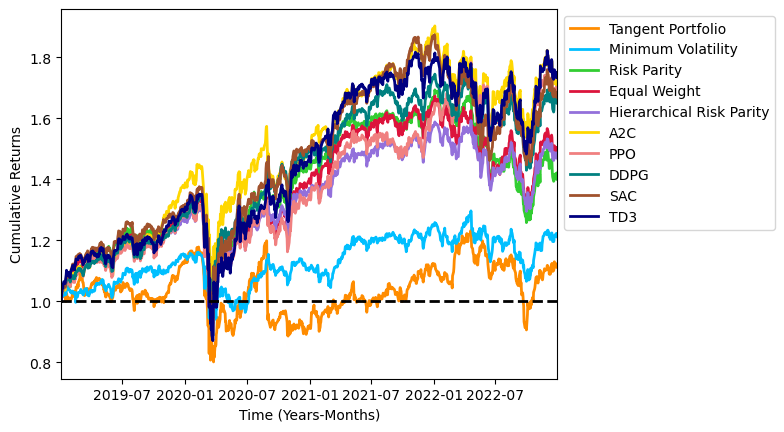

In [99]:
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='darkorange', label="Tangent Portfolio", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='deepskyblue', label="Minimum Volatility", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='limegreen', label="Risk Parity", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='crimson', label="Equal Weight", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_hierarchical, color='mediumpurple', label="Hierarchical Risk Parity", linewidth=2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='gold', label='A2C', linewidth=2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='lightcoral', label='PPO', linewidth=2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='teal', label='DDPG', linewidth=2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='sienna', label='SAC', linewidth=2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='navy', label='TD3', linewidth=2.0)



plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_max0.png',bbox_inches='tight')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

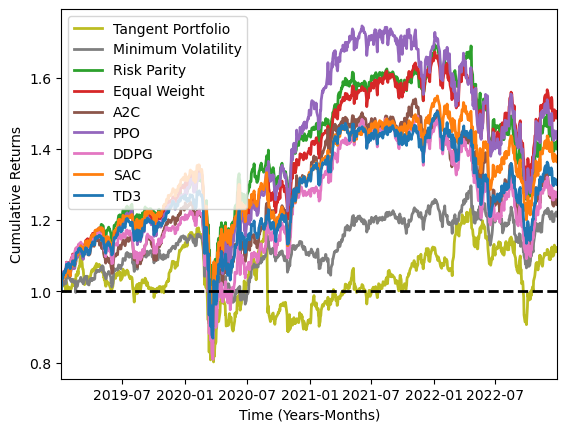

In [62]:
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_min0.png',bbox_inches='tight')

In [111]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

In [112]:
portfolio_weights_minvar_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_min_var[:,-1])]
return_stocks_minvar = np.sum(return_stocks.multiply(portfolio_weights_minvar_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

KeyError: 'key of type tuple not found and not a MultiIndex'

In [114]:
return_stocks_ppo
return_stocks_a2c
return_stocks_ddpg
return_stocks_sac
return_stocks_td3
return_stocks_min_var
return_stocks_min_vol
return_stocks_risk
return_stocks_equal
return_stocks_hierarchical
print("")
return_stocks_equal

Date
2019-01-03    0.000000
2019-01-04    0.033201
2019-01-07    0.005261
2019-01-08    0.009860
2019-01-09    0.001375
                ...   
2022-12-23    0.004921
2022-12-27    0.001659
2022-12-28   -0.012192
2022-12-29    0.012441
2022-12-30   -0.001237
Length: 1007, dtype: float64

## Other statistics

In [66]:
import pyfolio

c:\anaconda3\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [132]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(return_stocks_td3, set_context=False)

c:\anaconda3\Lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
c:\anaconda3\Lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.5.5'

In [72]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%%**********************]  15 of 15 completed


AAPL         AMD        BAC         BLK        CVS  \
Date                                                                   
2023-12-06  192.320007  116.820000  30.530001  743.070007  73.500000   
2023-12-07  194.270004  128.369995  30.660000  745.440002  74.010002   
2023-12-08  195.710007  128.919998  30.959999  744.729980  75.099998   
2023-12-11  193.179993  134.410004  30.850000  752.409973  73.760002   
2023-12-12  194.710007  137.610001  30.740000  759.289978  73.589996   

                  DIS        INTU         JD          MA        NVDA   PBI  \
Date                                                                         
2023-12-06  91.202759  566.229980  26.600000  410.380005  455.029999  4.16   
2023-12-07  92.049995  571.489990  26.930000  413.149994  465.959991  4.20   
2023-12-08  92.820000  573.900024  26.450001  412.160004  475.059998  4.19   
2023-12-11  92.199997  586.659973  25.600000  415.709991  466.269989  4.13   
2023-12-12  91.070000  594.179993  25.180000  420.750000  476.570007  4.10   

                   TGT          TM         UL         WMT  
Date                                                       
2023-12-06  133.380005  189.889999  47.770000  153.470001  
2023-12-07  135.190002  190.240005  47.939999  152.460007  
2023-12-08  135.190002  187.279999  47.450001  150.860001  
2023-12-11  136.759995  187.080002  47.360001  151.240005  
2023-12-12  135.660004  184.800003  47.540001  151.360001

In [87]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(train_re_df)
rets.tail()

AXP.N      BA.N     CAT.N     CRM.N     CVX.N     DIS.N  \
Date                                                                     
2018-12-26  0.048492  0.067208  0.066781  0.078381  0.063373  0.054609   
2018-12-27  0.008951  0.010225  0.015309  0.033323  0.017972  0.006520   
2018-12-28 -0.002746 -0.002396 -0.008368 -0.003846 -0.006129  0.007323   
2018-12-31  0.009532  0.019344  0.011623  0.017003  0.001289  0.021901   
2019-01-02  0.003777  0.004062 -0.005430 -0.010367  0.017465 -0.006202   

                GS.N      HD.N     IBM.N     JNJ.N  ...     TRV.N     UNH.N  \
Date                                                ...                       
2018-12-26  0.042085  0.064120  0.035512  0.031504  ...  0.040309  0.044690   
2018-12-27  0.015221  0.012123  0.021456  0.005524  ...  0.012802  0.010766   
2018-12-28 -0.014388 -0.000587 -0.006592 -0.001099  ... -0.003623  0.001098   
2018-12-31  0.024658  0.009400  0.005662  0.013986  ...  0.012771  0.011696   
2019-01-02  0.029811  0.003434  0.013548 -0.010074  ... -0.019875 -0.022600   

                 V.N      VZ.N     WMT.N    AAPL.O    AMGN.O    CSCO.O  \
Date                                                                     
2018-12-26  0.069827  0.026202  0.053484  0.070422  0.053027  0.054369   
2018-12-27  0.013668  0.013042  0.013052 -0.006490  0.013148  0.010360   
2018-12-28 -0.008105  0.002176  0.005896  0.000512  0.002102 -0.003263   
2018-12-31  0.007637  0.017188  0.011071  0.009665  0.020657  0.013093   
2019-01-02  0.007428 -0.003557  0.002040  0.001141 -0.014229 -0.008770   

              INTC.O    MSFT.O  
Date                            
2018-12-26  0.059647  0.068310  
2018-12-27  0.003680  0.006165  
2018-12-28  0.008412 -0.007808  
2018-12-31  0.003850  0.011754  
2019-01-02  0.003196 -0.004430  

[5 rows x 27 columns]

In [100]:
from pypfopt import HRPOpt

hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AXP.N', 0.02012),
             ('BA.N', 0.02145),
             ('CAT.N', 0.01439),
             ('CRM.N', 0.01476),
             ('CVX.N', 0.03708),
             ('DIS.N', 0.02926),
             ('GS.N', 0.01287),
             ('HD.N', 0.03401),
             ('IBM.N', 0.04172),
             ('JNJ.N', 0.05738),
             ('JPM.N', 0.01357),
             ('KO.N', 0.05842),
             ('MCD.N', 0.09226),
             ('MMM.N', 0.03074),
             ('MRK.N', 0.03396),
             ('NKE.N', 0.02369),
             ('PG.N', 0.07329),
             ('TRV.N', 0.03384),
             ('UNH.N', 0.0356),
             ('V.N', 0.02985),
             ('VZ.N', 0.06159),
             ('WMT.N', 0.09317),
             ('AAPL.O', 0.02309),
             ('AMGN.O', 0.02969),
             ('CSCO.O', 0.0254),
             ('INTC.O', 0.03316),
             ('MSFT.O', 0.02562)])

In [89]:
hrp.portfolio_performance(verbose=True)

Expected annual return: 10.5%
Annual volatility: 12.8%
Sharpe Ratio: 0.67


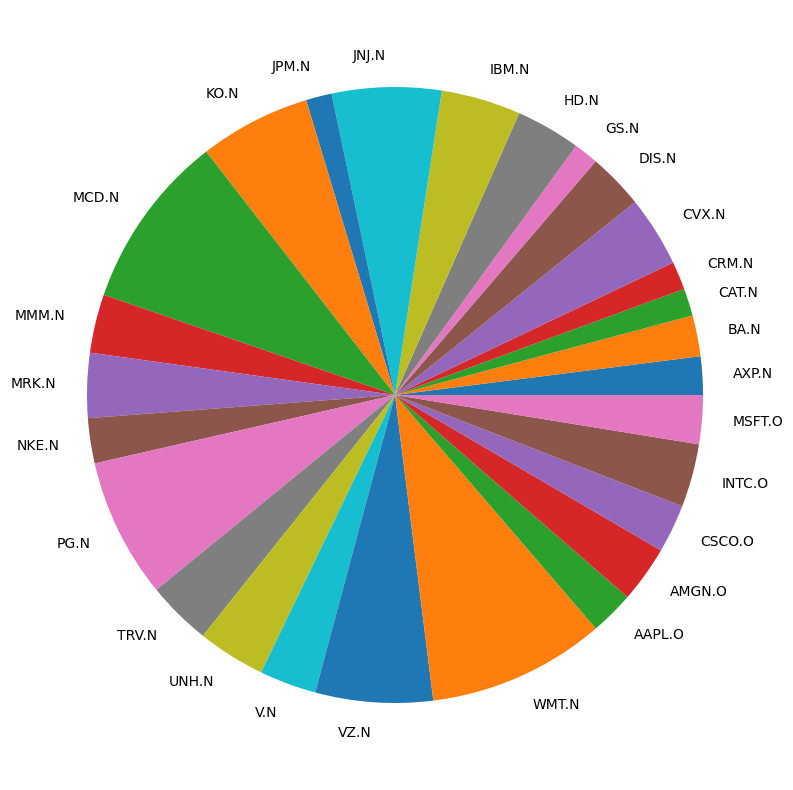

In [101]:
pd.Series(weights).plot.pie(figsize=(10, 10));

c:\anaconda3\Lib\site-packages\pypfopt\plotting.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-deep")


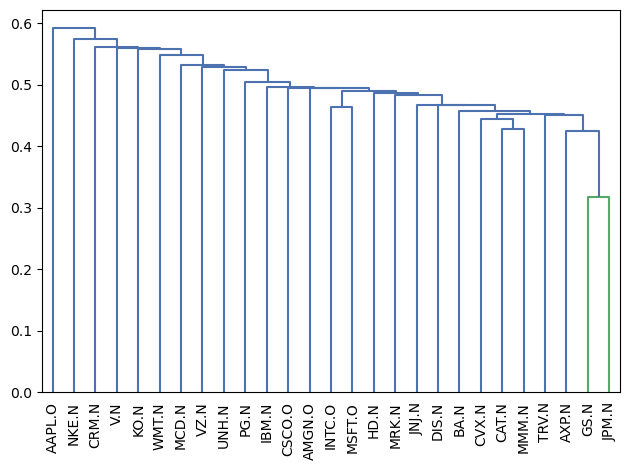

In [102]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp); 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


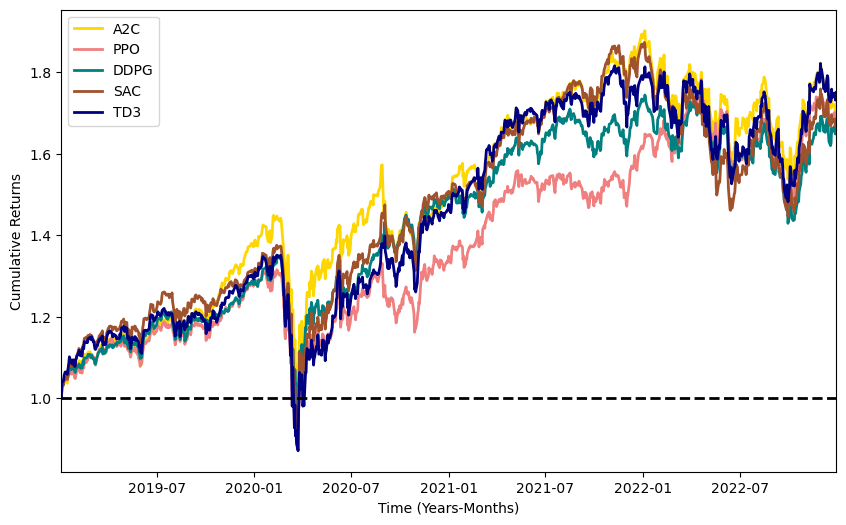

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(x, a2c, color='gold', label='A2C', linewidth=2.0)
plt.plot(x, ppo, color='lightcoral', label='PPO', linewidth=2.0)
plt.plot(x, ddpg, color='teal', label='DDPG', linewidth=2.0)
plt.plot(x, sac, color='sienna', label='SAC', linewidth=2.0)
plt.plot(x, td3, color='navy', label='TD3', linewidth=2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()


# Save the figure in EPS format for high-quality printing
plt.savefig(str(rebalance_period)+'22_cumulative_returns_traditional.eps', format='eps', dpi=1200, bbox_inches='tight')
save_path = 'D:\\公众号图片\\' + str(rebalance_period) + '22_cumulative_returns_traditional.eps'
plt.savefig(save_path, format='eps', dpi=1200, bbox_inches='tight')


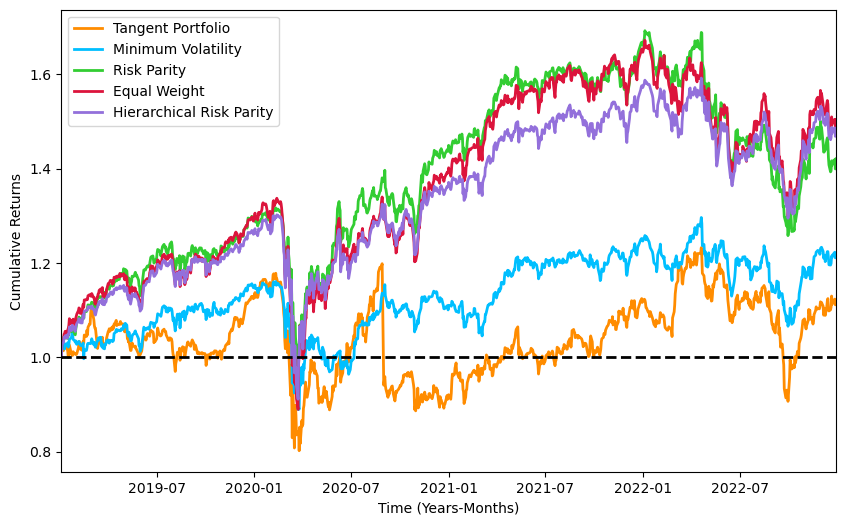

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(x, Cumulative_returns_daily_min_var, color='darkorange', label="Tangent Portfolio", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='deepskyblue', label="Minimum Volatility", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='limegreen', label="Risk Parity", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='crimson', label="Equal Weight", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_hierarchical, color='mediumpurple', label="Hierarchical Risk Parity", linewidth=2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_traditional.png',bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


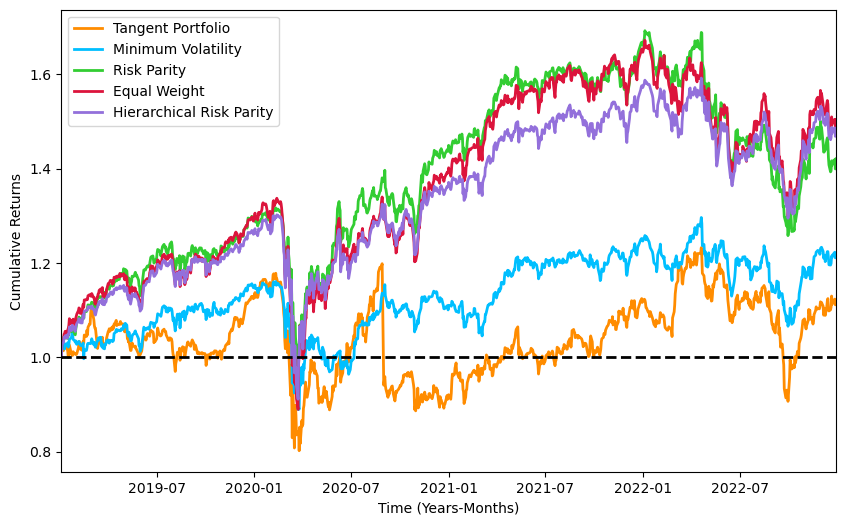

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(x, Cumulative_returns_daily_min_var, color='darkorange', label="Tangent Portfolio", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='deepskyblue', label="Minimum Volatility", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='limegreen', label="Risk Parity", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='crimson', label="Equal Weight", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_hierarchical, color='mediumpurple', label="Hierarchical Risk Parity", linewidth=2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()

# Save the figure in EPS format for high-quality printing
plt.savefig(str(rebalance_period)+'_cumulative_returns_traditional.eps', format='eps', dpi=1200, bbox_inches='tight')
save_path = 'D:\\公众号图片\\' + str(rebalance_period) + '_cumulative_returns_traditional.eps'
plt.savefig(save_path, format='eps', dpi=1200, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


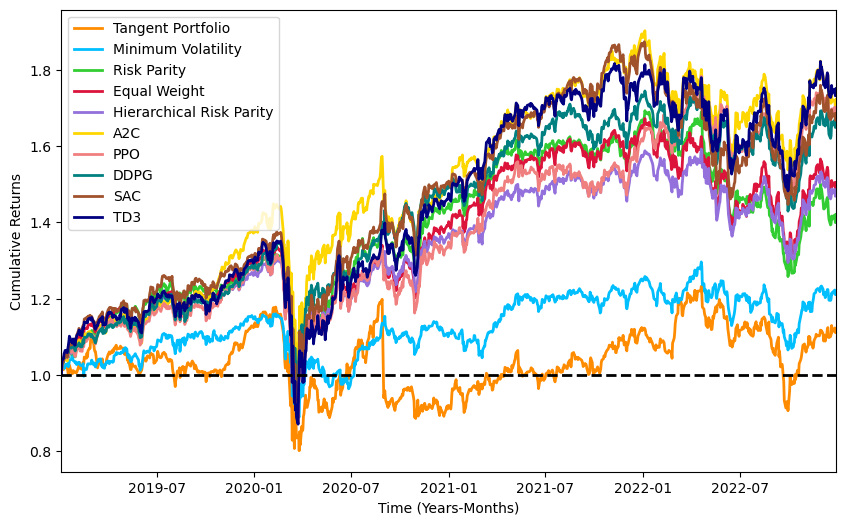

In [135]:
x = Cumulative_returns_daily_equal.index.values
plt.figure(figsize=(10, 6))
plt.plot(x, Cumulative_returns_daily_min_var, color='darkorange', label="Tangent Portfolio", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='deepskyblue', label="Minimum Volatility", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='limegreen', label="Risk Parity", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='crimson', label="Equal Weight", linewidth=2.0)
plt.plot(x, Cumulative_returns_daily_hierarchical, color='mediumpurple', label="Hierarchical Risk Parity", linewidth=2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='gold', label='A2C', linewidth=2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='lightcoral', label='PPO', linewidth=2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='teal', label='DDPG', linewidth=2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='sienna', label='SAC', linewidth=2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='navy', label='TD3', linewidth=2.0)



plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.legend()
# Save the figure in EPS format for high-quality printing
plt.savefig(str(rebalance_period)+'33_cumulative_returns_traditional.eps', format='eps', dpi=1200, bbox_inches='tight')
save_path = 'D:\\公众号图片\\' + str(rebalance_period) + '33_cumulative_returns_traditional.eps'
plt.savefig(save_path, format='eps', dpi=1200, bbox_inches='tight')